In [134]:
import pandas as pd
import numpy as np

In [135]:
df = pd.read_csv('Drug200.csv')

In [136]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [137]:
df['Age'].value_counts().head()

47    8
23    7
28    7
49    7
39    6
Name: Age, dtype: int64

In [138]:
df['Sex'].value_counts()

M    104
F     96
Name: Sex, dtype: int64

In [139]:
df['BP'].value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

In [140]:
df['Cholesterol'].value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

In [141]:
df['Na_to_K'].round(1).value_counts()

12.9    6
10.1    5
11.3    5
7.3     4
9.7     4
       ..
8.4     1
20.7    1
29.9    1
27.8    1
11.6    1
Name: Na_to_K, Length: 120, dtype: int64

In [142]:
df['Drug'].value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [143]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [144]:
df["Drug"].replace({"drugB": "DrugB", "drugC": "DrugC","drugX": "DrugX","drugA": "DrugA"}, inplace=True)

In [145]:
Drug = df.groupby(['Drug','Sex','Age']).sum()
Drug.reset_index(inplace=True)

In [146]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [147]:
df[['Drug']].value_counts()

Drug 
DrugY    91
DrugX    54
DrugA    23
DrugB    16
DrugC    16
dtype: int64

In [148]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,DrugC
2,47,M,LOW,HIGH,10.114,DrugC
3,28,F,NORMAL,HIGH,7.798,DrugX
4,61,F,LOW,HIGH,18.043,DrugY


In [149]:
Drug_Effects = df.groupby(['BP','Cholesterol','Na_to_K'])['BP'].size()
Drug_Effects = Drug_Effects.unstack()

Text(0.5, 1.0, 'Distribution of the ratio between Sodium and Potassium')

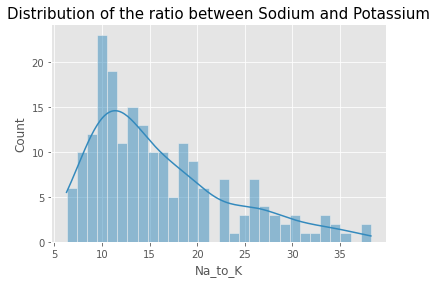

In [150]:
sns.histplot(df['Na_to_K'],bins=30,kde=True)
plt.title('Distribution of the ratio between Sodium and Potassium',fontdict={'fontsize':'15'})

In [151]:
Drug_Effects.head()

Na_to_K             6.269   6.683   6.769   7.261   7.285   7.298   7.340   \
BP     Cholesterol                                                           
HIGH   HIGH            NaN     NaN     NaN     NaN     NaN     NaN     NaN   
       NORMAL          1.0     NaN     NaN     NaN     NaN     NaN     NaN   
LOW    HIGH            NaN     NaN     1.0     NaN     NaN     1.0     NaN   
       NORMAL          NaN     NaN     NaN     NaN     NaN     NaN     1.0   
NORMAL HIGH            NaN     NaN     NaN     NaN     NaN     NaN     NaN   

Na_to_K             7.477   7.490   7.761   ...  31.686  31.876  32.922  \
BP     Cholesterol                          ...                           
HIGH   HIGH            NaN     1.0     NaN  ...     NaN     NaN     NaN   
       NORMAL          NaN     NaN     NaN  ...     NaN     1.0     NaN   
LOW    HIGH            NaN     NaN     NaN  ...     NaN     NaN     NaN   
       NORMAL          NaN     NaN     NaN  ...     NaN     NaN     1.0   
NORMAL HIGH            1.0     NaN     1.0  ...     1.0     NaN     NaN   

Na_to_K             33.486  33.542  34.686  34.997  35.639  37.188  38.247  
BP     Cholesterol                                                          
HIGH   HIGH            NaN     NaN     1.0     NaN     NaN     1.0     NaN  
       NORMAL          NaN     NaN     NaN     1.0     1.0     NaN     NaN  
LOW    HIGH            1.0     NaN     NaN     NaN     NaN     NaN     1.0  
       NORMAL          NaN     1.0     NaN     NaN     NaN     NaN     NaN  
NORMAL HIGH            NaN     NaN     NaN     NaN     NaN     NaN     NaN  

[5 rows x 198 columns]

In [152]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,DrugC
2,47,M,LOW,HIGH,10.114,DrugC
3,28,F,NORMAL,HIGH,7.798,DrugX
4,61,F,LOW,HIGH,18.043,DrugY


(array([0, 1]), [Text(0, 0, 'F'), Text(1, 0, 'M')])

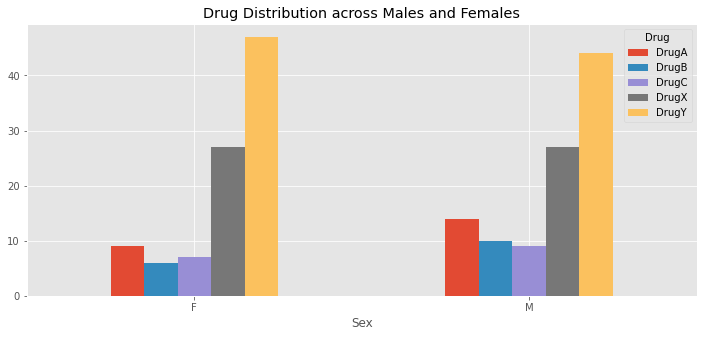

In [153]:
pd.crosstab(df.Sex,df.Drug).plot(kind="bar",figsize=(12,5))
plt.title('Drug Distribution across Males and Females')
plt.xticks(rotation=0)

In [154]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [155]:
def get_summary_statistics(dataset):
    
    mean = np.round(np.mean(dataset), 2)
    median = np.round(np.median(dataset), 2)
    min_value = np.round(dataset.min(), 2)
    max_value = np.round(dataset.max(), 2)
    quartile_1 = np.round(dataset.quantile(0.25), 2)
    quartile_3 = np.round(dataset.quantile(0.75), 2)
    print('Min: %s' % min_value)
    print('Mean: %s' % mean)
    print('Max: %s' % max_value)
    print('25th percentile: %s' % quartile_1)
    print('Median: %s' % median)
    print('75th percentile: %s' % quartile_3)

In [156]:
get_summary_statistics(df['Age'])

Min: 15
Mean: 44.32
Max: 74
25th percentile: 31.0
Median: 45.0
75th percentile: 58.0


Text(0.5, 1.0, 'Min-Max and Quartiles of the Age column in Dataset')

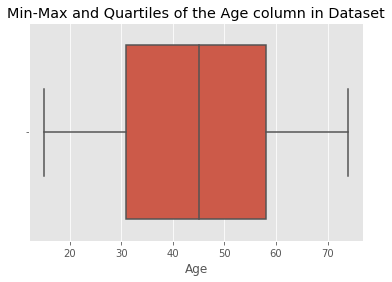

In [157]:
ax = sns.boxplot(x='Age',data=df,hue='Sex')
plt.title('Min-Max and Quartiles of the Age column in Dataset')

# *Insights*:
### Min Age: 15
### Mean Age: 44
### Max Age: 74
### 25th percentile of the patients are : 31 years old
### The Median age is: 45
### 75th percentile of the patients are : 58 years old

Text(0.5, 1.0, 'Count of Types of Drugs distributed among the patients')

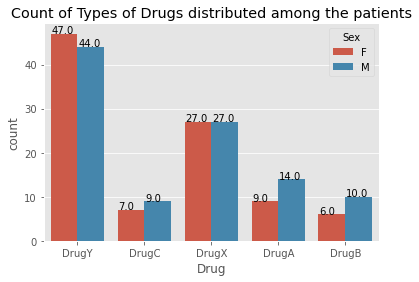

In [158]:
ax = sns.countplot(x='Drug',data=df,hue='Sex')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.01, p.get_height()+0.10))
plt.title("Count of Types of Drugs distributed among the patients")

In [159]:
df['Na_to_K'].describe()

count    200.000000
mean      16.084485
std        7.223956
min        6.269000
25%       10.445500
50%       13.936500
75%       19.380000
max       38.247000
Name: Na_to_K, dtype: float64

Text(0.5, 1.0, 'Sodium to Potassium ratio among the patients')

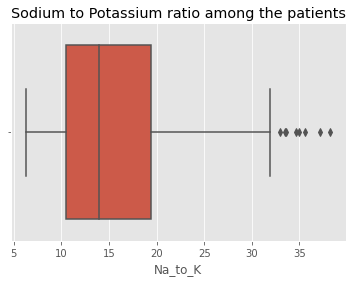

In [160]:
sns.boxplot(x='Na_to_K',data=df)
plt.title('Sodium to Potassium ratio among the patients')

## Effects of having a *sodium-potassium* ratio either too large or too small:
### A sodium-potassium ratio that is too large or too small may produce certain pathological conditions that can lead to health concerns, such as problems with the cardiovascular system and adrenal glands.

In [161]:
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
colors = ['#494BD3', '#E28AE2', '#F1F481', '#79DB80', '#DF5F5F',
              '#69DADE', '#C2E37D', '#E26580', '#D39F49', '#B96FE3']
from plotly.offline import init_notebook_mode, iplot

In [162]:
df.loc[(df['Na_to_K'] < 29) & (df['Na_to_K'] > 24.5), 'New_Na_to_K'] = 'Good Na/K'
df.loc[(df['Na_to_K'] > 29) | (df['Na_to_K'] < 24.5),'New_Na_to_K'] = 'Bad Na/K'

In [163]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,New_Na_to_K
0,23,F,HIGH,HIGH,25.355,DrugY,Good Na/K
1,47,M,LOW,HIGH,13.093,DrugC,Bad Na/K
2,47,M,LOW,HIGH,10.114,DrugC,Bad Na/K
3,28,F,NORMAL,HIGH,7.798,DrugX,Bad Na/K
4,61,F,LOW,HIGH,18.043,DrugY,Bad Na/K


Text(0.5, 1.0, 'Good Sodium-Potassium ratio vs Bad Sodium-Potassium ratio')

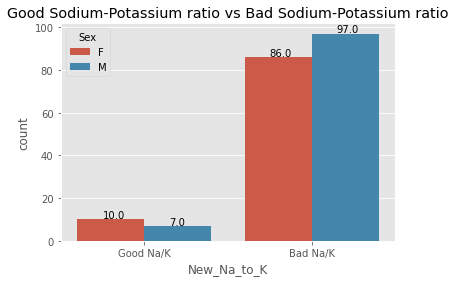

In [164]:
ax1 = sns.countplot(x='New_Na_to_K',data=df,hue='Sex')
for p in ax1.patches:
   ax1.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.5))
plt.title('Good Sodium-Potassium ratio vs Bad Sodium-Potassium ratio')

## *Insights*:
### - A large group of patients have a Bad Na/K ratio

In [201]:
df1 =df.groupby(['Drug','New_Na_to_K']).size()
df1.head()

Drug   New_Na_to_K
DrugA  Bad Na/K       23
DrugB  Bad Na/K       16
DrugC  Bad Na/K       16
DrugX  Bad Na/K       54
DrugY  Bad Na/K       74
dtype: int64

Text(0.5, 1.0, 'Comparison of drugs given to Patients with good and bad Na/K ratio')

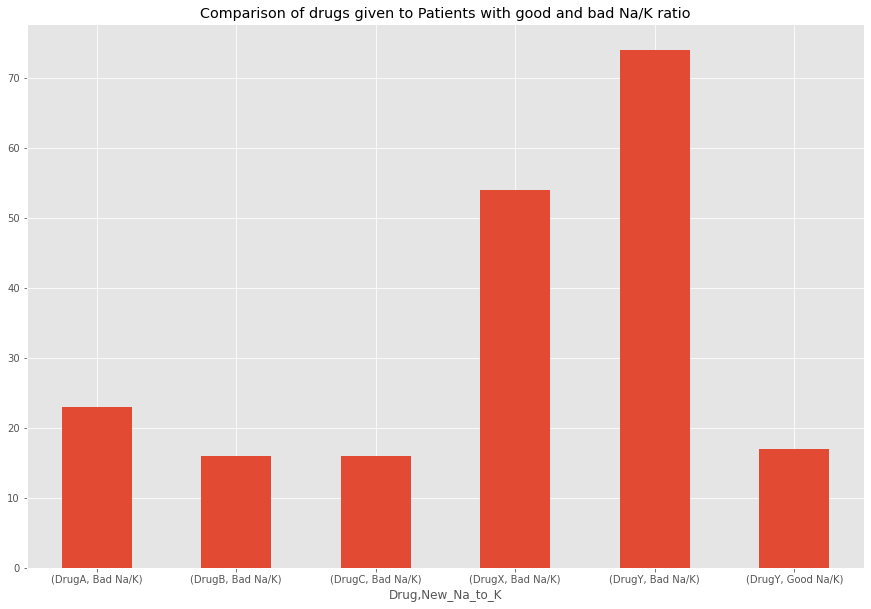

In [211]:
df1.plot(figsize = (15,10),kind='bar')
plt.xticks(rotation=0)
plt.title('Comparison of drugs given to Patients with good and bad Na/K ratio')

## *Insights*:
### - Most of the drug types were used to treat patients with bad Na/K ratio.
### - Drug Y in contrast is the only drug that was given to patients with good Na/K ratio.

In [219]:
df2 =df.groupby(['Drug','BP']).size()
df2.head()

Drug   BP    
DrugA  HIGH      23
DrugB  HIGH      16
DrugC  LOW       16
DrugX  LOW       18
       NORMAL    36
dtype: int64

Text(0.5, 1.0, 'Comparison of drugs given to Patients with different levels of BP')

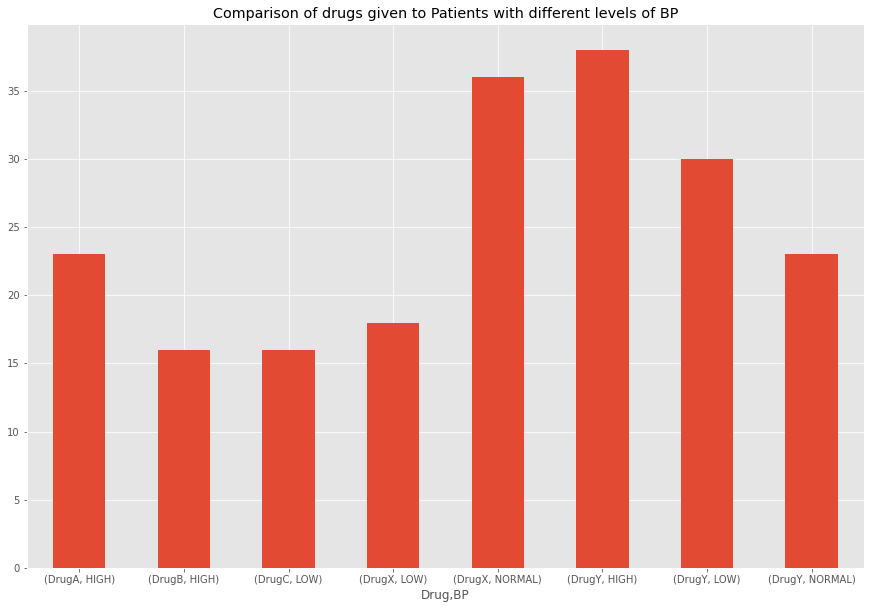

In [220]:
df2.plot(figsize = (15,10),kind='bar')
plt.xticks(rotation=0)
plt.title('Comparison of drugs given to Patients with different levels of BP')

## *Insights*:
### - There are more occurences of Drug Y in treating patients with BP levels ranging from LOW to HIGH.
### - Drug X's use was excluded in treating patients with High BP level
### - Drug X and Drug Y may have some common characteristics in their Formula.